In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 셋 불러 오기
file_path = '/content/drive/MyDrive/Colab Notebooks/big_data_class/student_sleep_patterns.csv'
data = pd.read_csv(file_path)

In [ ]:
# 데이터 기본 정보 확인
print("데이터 정보:")
print(data.info())
print("\n데이터 통계 요약:")
print(data.describe())
print("\n데이터의 첫 5행:")
print(data.head())

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None

데이터 통계 요약:
       

In [ ]:
# 2. 데이터 전처리
# 결측치 확인
print("\n결측치 개수:")
print(data.isnull().sum())

# 결측치 처리 (숫자 열과 범주형 열을 구분하여 처리)
# 숫자 열: 평균값으로 대체
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# 범주형 열: 최빈값(모드)으로 대체
categorical_cols = data.select_dtyㅇpes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 결과 확인
print("\n결측치 처리 후 데이터:")
print(data.isnull().sum())


결측치 개수:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

결측치 처리 후 데이터:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64


<ipython-input-7-f7753a33278e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


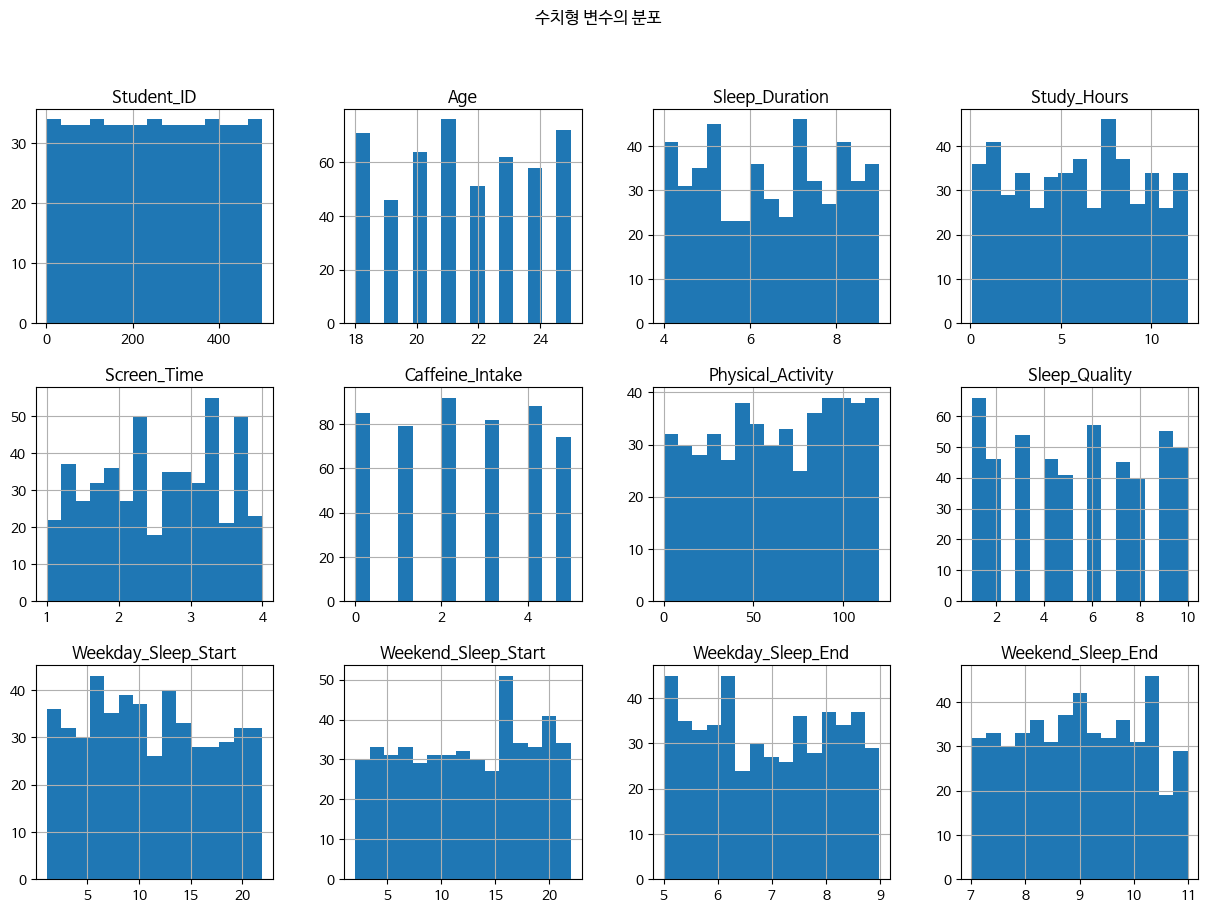

In [ ]:
# 3. 기술 통계 및 시각화
# 수치형 변수의 히스토그램
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('수치형 변수의 분포')
plt.show()

In [ ]:
# 4. 상관관계 분석
# 상관 행렬 계산 (숫자형 열만 선택)
numeric_cols = data.select_dtypes(include=[np.number]).columns  # 숫자형 열 선택
numeric_data = data[numeric_cols]  # 숫자형 열로 구성된 데이터프레임 생성

# 상관 행렬 계산
corr_matrix = numeric_data.corr()

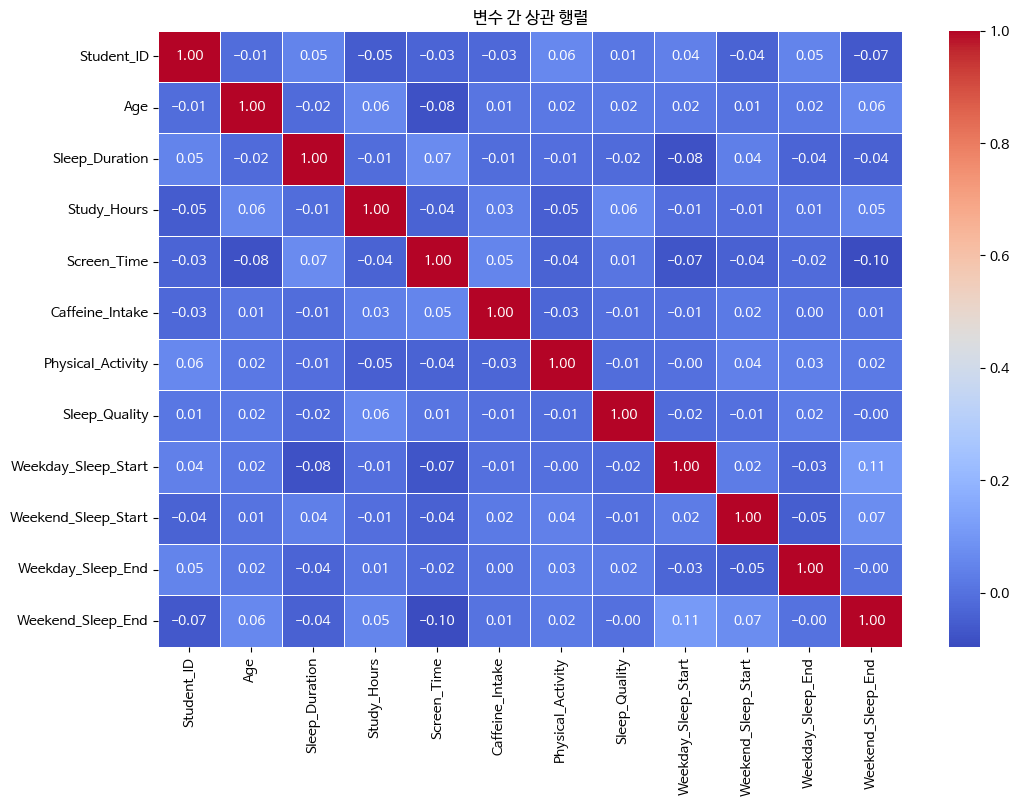

In [ ]:
# 상관 행렬 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('변수 간 상관 행렬')
plt.show()

In [ ]:
# 5. 회귀 분석
# 범주형 변수는 원-핫 인코딩을 통해 숫자형 변수로 변환
X = pd.get_dummies(data.drop(columns=['Study_Hours']), drop_first=True)  # 'Study_Hours'는 종속 변수
y = data['Study_Hours']  # 종속 변수

In [ ]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 다중 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

In [ ]:
# 모델 평가
r2 = r2_score(y_test, y_pred)
print(f"\n다중 선형 회귀 모델의 R^2 점수: {r2:.2f}")


다중 선형 회귀 모델의 R^2 점수: -0.06


In [ ]:
# 회귀 계수 출력
coefficients = pd.DataFrame({"변수": X.columns, "회귀 계수": model.coef_})
print("\n회귀 계수:")
print(coefficients)


회귀 계수:
                          변수     회귀 계수
0                 Student_ID -0.001842
1                        Age  0.027733
2             Sleep_Duration -0.003211
3                Screen_Time -0.126261
4            Caffeine_Intake  0.002349
5          Physical_Activity -0.004547
6              Sleep_Quality  0.107606
7        Weekday_Sleep_Start -0.030411
8        Weekend_Sleep_Start  0.016303
9          Weekday_Sleep_End  0.004750
10         Weekend_Sleep_End  0.155902
11               Gender_Male  0.970316
12              Gender_Other  0.950958
13  University_Year_2nd Year  0.150894
14  University_Year_3rd Year  0.544080
15  University_Year_4th Year  0.054679


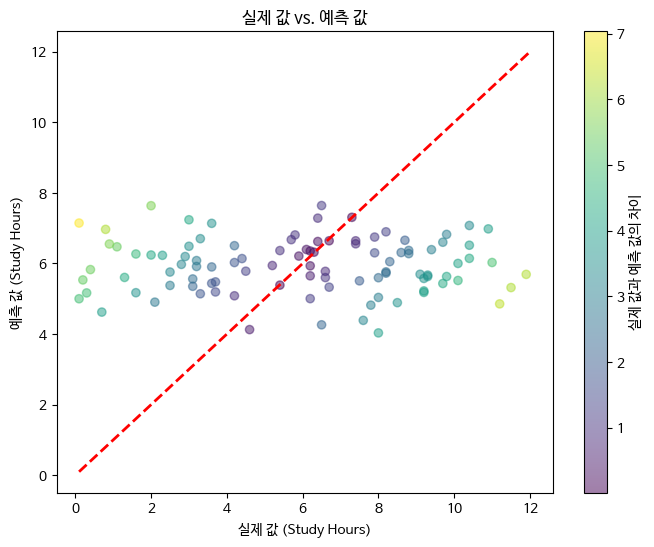

In [ ]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='viridis')
plt.colorbar(label="실제 값과 예측 값의 차이")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("실제 값 vs. 예측 값")
plt.xlabel("실제 값 (Study Hours)")
plt.ylabel("예측 값 (Study Hours)")
plt.show()